# Exploratory Data Analysis
   ---
*By Tan Yu Xuan                    31 Jan 2022*

# Imported Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# change to nicer default style
plt.style.use('seaborn')
%matplotlib inline

The dataset was downloaded from https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction.

It contains patients' health information from Cleveland, Hungary, Switzerland, and the VA Long Beach.

With insights on these, we can draw correlations to see which features lead to heart diease and perhaps predict patients with heart diease.

**List of attributes**

| Attribute | Description |
|-----------|-------------|
|Age|age of patient [in years]|
|Sex|sex of patient [M: Male, F: Female]|
|ChestPainType|chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]|
|RestingBP|resting blood pressure [mm Hg]|
|Cholesterol|serum cholesterol [mm/dl]|
|FastingBS|fasting blood sugar [1: if FastingBS > 120mg/dl, 0: otherwise]|
|RestingECG|Resting electrocargiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]|
|MaxHR|maximum heart rate achieved [Numeric value between 60 and 202]|
|ExerciseAngina|exercise-induced agina [Y: Yes, N: No]|
|OldPeak|old peak = ST [Numeric value measured in depression]|
|ST_Slope|the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]|
|HeartDisease|output class [1: heart diease, 0: Normal]|

# Importing Dataset

In [2]:
# Read csv into pandas DataFrame
df = pd.read_csv(r'data\heart.csv')

# Heart Dataset

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


The following features to be modified for modelling preparation:
1. Sex - encoded
2. ChestPainType - classify according to intensity of pain (3:TA, 2:ATA, 1:NAP, 0:ASY)
3. RestingECG - classify according to severity (0:Normal, 1:ST, 2:LVH)
4. ExerciseAngina - encoded (0: N, 1: Y)
5. ST_Slope - classify according to severity (0:up, 1:flat, 2:Down)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


No missing values.

In [8]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

# Feature Engineering

## Sex (Gender)

In [86]:
df.loc[(df['Sex'] == 'M'), 'Male'] = 1
df.loc[(df['Sex'] != 'M'), 'Male'] = 0

In [87]:
df.loc[(df['Sex'] == 'F'), 'Female'] = 1
df.loc[(df['Sex'] != 'F'), 'Female'] = 0

## Chest Pain Type

 Chest pain can result from blocked or reduced blood flow to the heart – known as a heart attack.

In [107]:
chestpain_dict = {'TA':3, 'ATA':2, 'NAP':1, 'ASY':0}
df['ChestPainType_rank'] = df['ChestPainType'].replace(chestpain_dict)

## Resting BP

In [118]:
df['RestingBP'].describe()

count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

In [119]:
df[df['RestingBP'] < 60]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Male,Female,ChestPainType_rank
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1,1.0,0.0,1


In [125]:
df=df.drop(df.index[449])

## Cholesterol

High levels of cholesterol can increase your risk of heart disease. With high cholesterol, you can develop fatty deposits in your blood vessels. Eventually, these deposits grow, making it difficult for enough blood to flow through your arteries.

[Text(0.5, 1.0, 'Histogram of Cholesterol')]

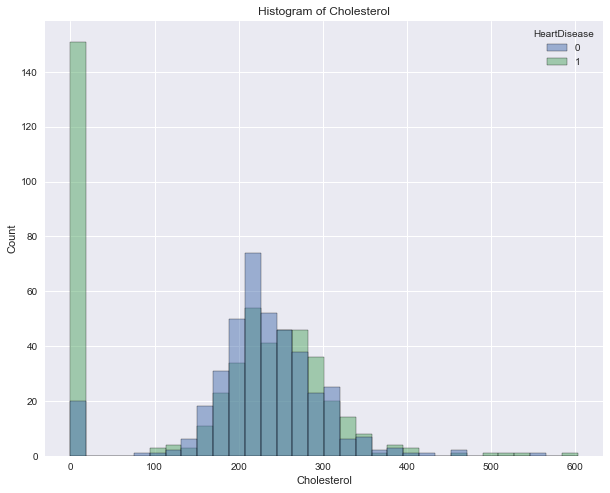

In [133]:
plt.figure(figsize=(10,8))
sns.histplot(data=df, x='Cholesterol', hue='HeartDisease').set(title='Histogram of Cholesterol')

From the graph, there are cholesterols with zero values. Impute zero cholesterol with mean values.

In [ ]:
df_no_heartdisease = df[df['HeartDisease'] == 0]
df_heartdisease = df[df['HeartDisease'] == 1]

In [142]:
positive_cholesterol_no_heartdisease = df_no_heartdisease[df_no_heartdisease['Cholesterol'] != 0]

In [143]:
mean_positive_cholesterol_no_heartdisease = positive_cholesterol_no_heartdisease['Cholesterol'].mean()

In [146]:
positive_cholesterol_heartdisease = df_heartdisease[df_heartdisease['Cholesterol'] != 0]

In [147]:
mean_positive_cholesterol_heartdisease = positive_cholesterol_heartdisease['Cholesterol'].mean()

In [153]:
zero_cholesterol_no_heartdisease_cond = (df['Cholesterol'] == 0) & (df['HeartDisease'] == 0)
zero_cholesterol_heartdisease_cond = (df['Cholesterol'] == 0) & (df['HeartDisease'] == 1)

In [150]:
df['Cholesterol'] = np.where(zero_cholesterol_no_heartdisease_cond, mean_positive_cholesterol_no_heartdisease, df['Cholesterol'])

In [154]:
df['Cholesterol'] = np.where(zero_cholesterol_heartdisease_cond, mean_positive_cholesterol_heartdisease, df['Cholesterol'])

## Resting ECG

In [173]:
ecg_dict = {'Normal':0, 'ST':1, 'LVH':2}
df['RestingECG_rank'] = df['RestingECG'].replace(ecg_dict)

In [174]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Male,Female,ChestPainType_rank,RestingECG_rank
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0,1.0,0.0,2,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1,0.0,1.0,1,0
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0,1.0,0.0,2,1
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1,0.0,1.0,0,0
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0,1.0,0.0,1,0


# EDA

## Age

Aging can cause changes in the heart and blood vessels that may increase a person's risk of developing cardiovascular disease. 

[Text(0.5, 1.0, 'Histogram of Age')]

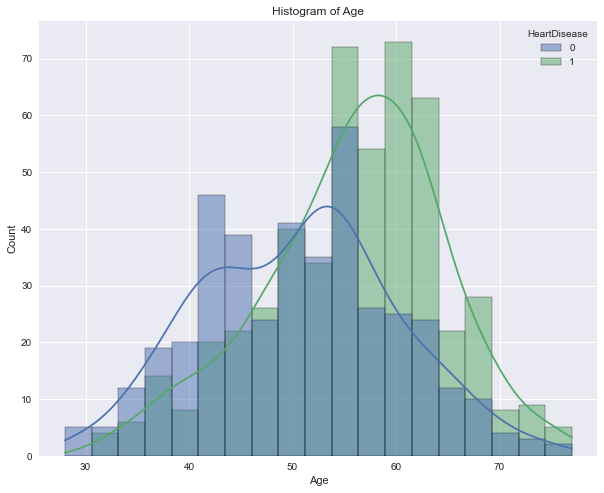

In [49]:
plt.figure(figsize=(10,8))
sns.histplot(data=df, x='Age', hue='HeartDisease', kde=True).set(title='Histogram of Age')

From the graph, older adults (ages > 54) are more likely to suffer from cardiovascular diease compared to younger ones.

# Sex

In [72]:
df_no_heartdisease = df[df['HeartDisease'] == 0]

In [73]:
df_heartdisease = df[df['HeartDisease'] == 1]

In [74]:
df_no_heartdisease_m = df_no_heartdisease[df_no_heartdisease['Sex'] == 'M']

In [75]:
df_no_heartdisease_f = df_no_heartdisease[df_no_heartdisease['Sex'] == 'F']

In [76]:
df_heartdisease_m = df_heartdisease[df_heartdisease['Sex'] == 'M']

In [77]:
df_heartdisease_f = df_heartdisease[df_heartdisease['Sex'] == 'F']

In [78]:
total_m = len(df_no_heartdisease_m) + len(df_heartdisease_m)
prop_no_heartdisease_m = len(df_no_heartdisease_m) / total_m
prop_heartdisease_m = 1 - prop_no_heartdisease_m

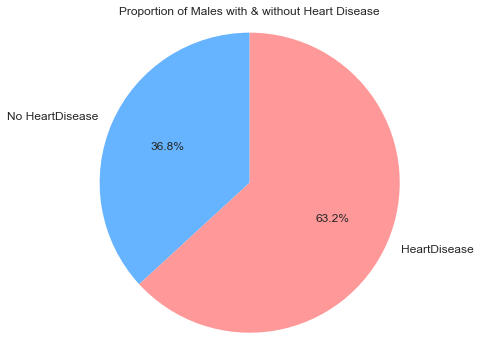

In [79]:
fig1, ax1 = plt.subplots(figsize=(6, 6))
ax1.pie([prop_no_heartdisease_m, prop_heartdisease_m], labels=['No HeartDisease', 'HeartDisease'], autopct='%1.1f%%',
        colors = ['#66b3ff','#ff9999'], startangle=90, textprops={'fontsize': 12})
ax1.axis('equal')

plt.title('Proportion of Males with & without Heart Disease')
plt.show()

In [80]:
total_f = len(df_no_heartdisease_f) + len(df_heartdisease_f)
prop_no_heartdisease_f = len(df_no_heartdisease_f) / total_f
prop_heartdisease_f = 1 - prop_no_heartdisease_f

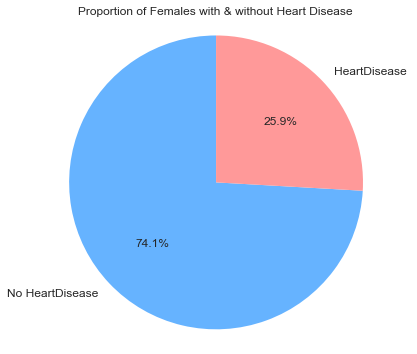

In [103]:
fig1, ax1 = plt.subplots(figsize=(7, 6))
ax1.pie([prop_no_heartdisease_f, prop_heartdisease_f], labels=['No HeartDisease', 'HeartDisease'], autopct='%1.1f%%',
        colors = ['#66b3ff','#ff9999'], startangle=90, textprops={'fontsize': 12})
ax1.axis('equal')

plt.title('Proportion of Females with & without Heart Disease')
plt.show()

## Chest Pain Type

In [93]:
df_heartdisease_asy = df_heartdisease[df_heartdisease['ChestPainType'] == 'ASY']
df_heartdisease_nap = df_heartdisease[df_heartdisease['ChestPainType'] == 'NAP']
df_heartdisease_ata = df_heartdisease[df_heartdisease['ChestPainType'] == 'ATA']
df_heartdisease_ta = df_heartdisease[df_heartdisease['ChestPainType'] == 'TA']

In [94]:
prop_heartdisease_asy = len(df_heartdisease_asy) / len(df_heartdisease)
prop_heartdisease_nap = len(df_heartdisease_nap) / len(df_heartdisease)
prop_heartdisease_ata = len(df_heartdisease_ata) / len(df_heartdisease)
prop_heartdisease_ta = len(df_heartdisease_ta) / len(df_heartdisease)

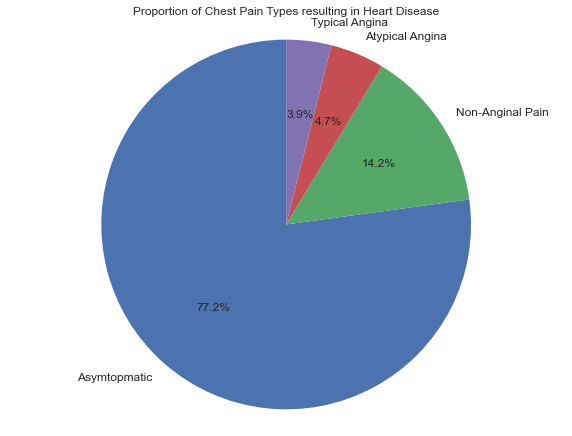

In [102]:
fig1, ax1 = plt.subplots(figsize=(10, 7.5))
ax1.pie([prop_heartdisease_asy, prop_heartdisease_nap, prop_heartdisease_ata, prop_heartdisease_ta], labels=['Asymtopmatic', 'Non-Anginal Pain', 'Atypical Angina', 'Typical Angina'], autopct='%1.1f%%',
        startangle=90, textprops={'fontsize': 12})
ax1.axis('equal')

plt.title('Proportion of Chest Pain Types resulting in Heart Disease')
plt.show()

In [104]:
df_no_heartdisease_asy = df_no_heartdisease[df_no_heartdisease['ChestPainType'] == 'ASY']
df_no_heartdisease_nap = df_no_heartdisease[df_no_heartdisease['ChestPainType'] == 'NAP']
df_no_heartdisease_ata = df_no_heartdisease[df_no_heartdisease['ChestPainType'] == 'ATA']
df_no_heartdisease_ta = df_no_heartdisease[df_no_heartdisease['ChestPainType'] == 'TA']

In [105]:
prop_no_heartdisease_asy = len(df_no_heartdisease_asy) / len(df_no_heartdisease)
prop_no_heartdisease_nap = len(df_no_heartdisease_nap) / len(df_no_heartdisease)
prop_no_heartdisease_ata = len(df_no_heartdisease_ata) / len(df_no_heartdisease)
prop_no_heartdisease_ta = len(df_no_heartdisease_ta) / len(df_no_heartdisease)

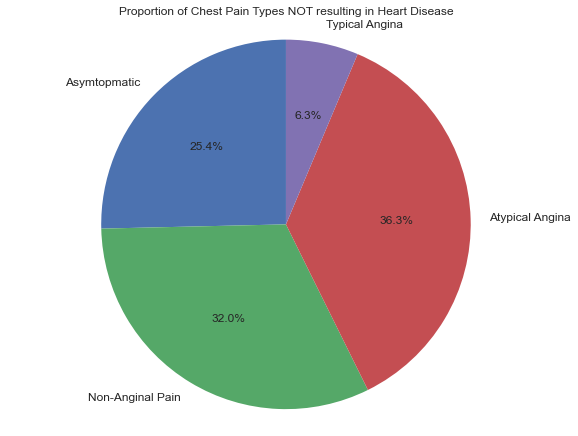

In [106]:
fig1, ax1 = plt.subplots(figsize=(10, 7.5))
ax1.pie([prop_no_heartdisease_asy, prop_no_heartdisease_nap, prop_no_heartdisease_ata, prop_no_heartdisease_ta], labels=['Asymtopmatic', 'Non-Anginal Pain', 'Atypical Angina', 'Typical Angina'], autopct='%1.1f%%',
        startangle=90, textprops={'fontsize': 12})
ax1.axis('equal')

plt.title('Proportion of Chest Pain Types NOT resulting in Heart Disease')
plt.show()

[Text(0.5, 1.0, 'Countplot of Chest Pain Type')]

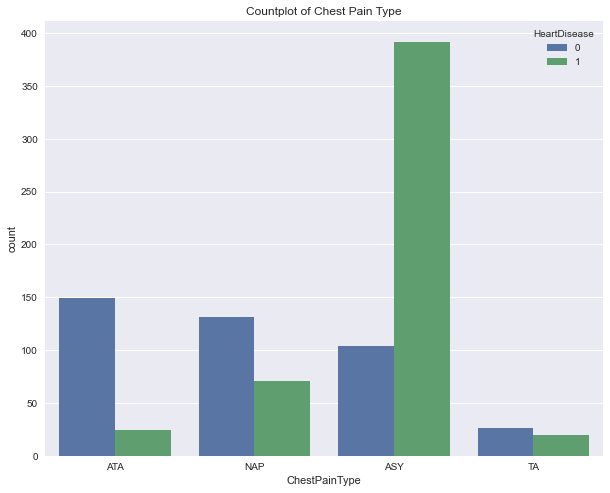

In [172]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='ChestPainType', hue='HeartDisease').set(title='Countplot of Chest Pain Type')

## Resting BP

[Text(0.5, 1.0, 'Histogram of Resting BP')]

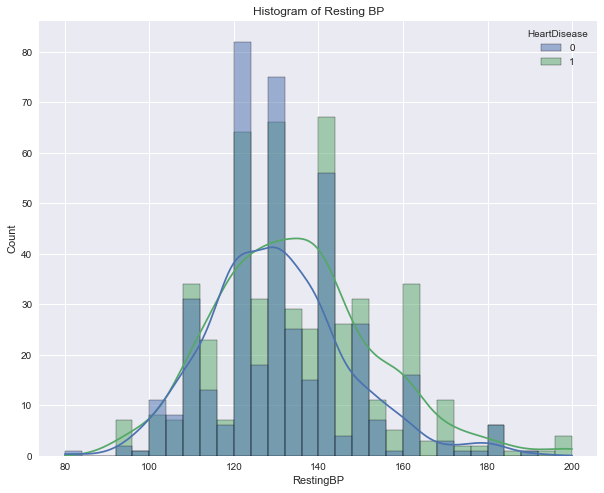

In [129]:
plt.figure(figsize=(10,8))
sns.histplot(data=df, x='RestingBP', hue='HeartDisease', kde=True).set(title='Histogram of Resting BP')

From the graph, those with higher blood pressure are slightly more likely to suffer from heart disease.

## Cholesterol

[Text(0.5, 1.0, 'Histogram of Cholesterol')]

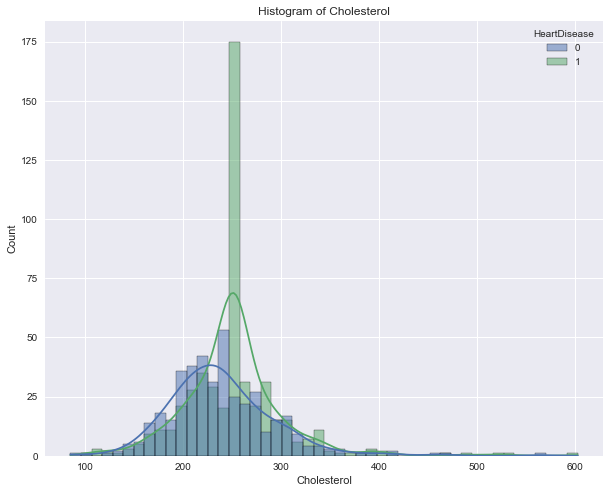

In [157]:
plt.figure(figsize=(10,8))
sns.histplot(data=df, x='Cholesterol', hue='HeartDisease', kde=True).set(title='Histogram of Cholesterol')

From the graph, those with higher cholesterol are likely to suffer from heart disease.

## Fasting Blood Sugar

[Text(0.5, 1.0, 'Barplot of Fasting Blood Sugar')]

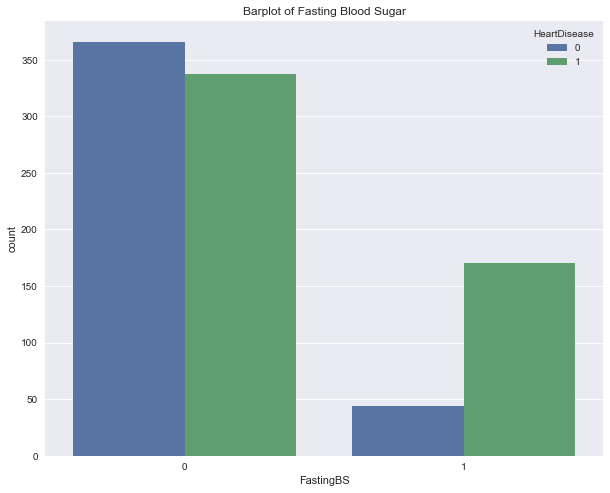

In [170]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='FastingBS', hue='HeartDisease').set(title='Countplot of Fasting Blood Sugar')

From the graph, bigger proportion of those with FastingBS=1 (fasting blood sugar > 120mg/dl) has higher chance of suffering from heart disease.

## Resting ECG

[Text(0.5, 1.0, 'Countplot of Resting ECG')]

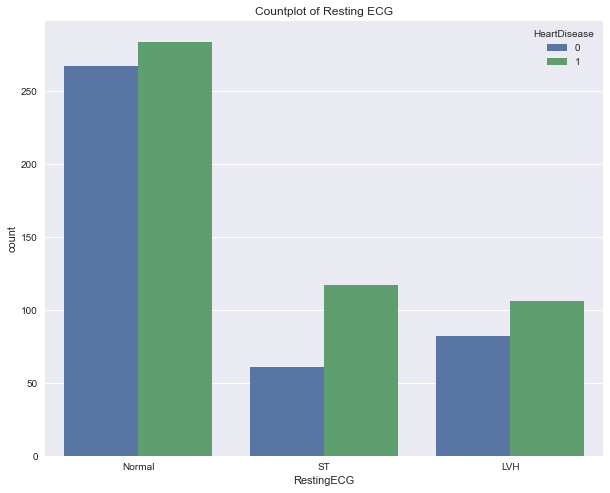

In [171]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='RestingECG', hue='HeartDisease').set(title='Countplot of Resting ECG')

From the graph, bigger proportion of those with ST resting ECG has higher chance of suffering from heart disease, followed by LVH then Normal resting ECG.

Conclusion

Blood pressure is not an accurate predictor of a heart attack. Sometimes a heart attack can cause an increase or decrease in blood pressure, but having a change in blood pressure reading doesn't always mean it's heart-related. 